# Somen Das 


# Unsupervised learning

## Classification of Data clusters using K-means algorithmns

#### Importing all required modules

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#### Loading data from built-in iris dataset

In [2]:
iris=datasets.load_iris()

In [3]:
data=pd.DataFrame(iris.data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### using elbow method to calculate the value of k

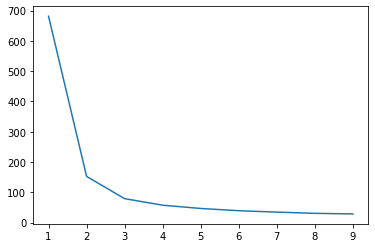

In [4]:
sse=[]
k_range= range(1,10)

for k in k_range:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(iris.data)
    sse.append(kmeans.inertia_)
    
plt.plot(k_range,sse)
plt.show()

#### from the graph we can see the elbow point is 3, Hence the no. of clusters we will create is 3.

### Creating a model oblect with 3 points

In [5]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(iris.data)

KMeans(n_clusters=3)

In [6]:
prediction=kmeans.labels_

#### adding the predicted value to the data frame

In [7]:
data['target']=prediction
data

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### scaling the sepal length, sepal width, peatl length,petal width into values between 0 and 1

In [8]:
scaler=MinMaxScaler()
scaler.fit(data[['sepal_length']])
data['sepal_length']=scaler.transform(data[['sepal_length']])

scaler.fit(data[['sepal_width']])
data['sepal_width']=scaler.transform(data[['sepal_width']])

scaler.fit(data[['petal_length']])
data['petal_length']=scaler.transform(data[['petal_length']])

scaler.fit(data[['petal_width']])
data['petal_width']=scaler.transform(data[['petal_width']])

In [9]:
data

,sepal_length,sepal_width,petal_length,petal_width,target
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2
146,0.555556,0.208333,0.677966,0.750000,1
147,0.611111,0.416667,0.711864,0.791667,2
148,0.527778,0.583333,0.745763,0.916667,2


#### predicting data according to the new datasets

In [10]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(data.iloc[:,0:4])

KMeans(n_clusters=3)

In [11]:
prediction=kmeans.labels_
data['target']=prediction
data

,sepal_length,sepal_width,petal_length,petal_width,target
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,1
146,0.555556,0.208333,0.677966,0.750000,2
147,0.611111,0.416667,0.711864,0.791667,1
148,0.527778,0.583333,0.745763,0.916667,1


#### seperating data according to setosa, versicolor, verginica

In [12]:
df1=data[data.target==0]
df2=data[data.target==1]
df3=data[data.target==2]

#### getting the centroids

In [13]:
kmeans.cluster_centers_

array([[0.19611111, 0.595     , 0.07830508, 0.06083333],
       [0.70726496, 0.4508547 , 0.79704476, 0.82478632],
       [0.44125683, 0.30737705, 0.57571548, 0.54918033]])

##### 1st column = sepal length
##### 2st column = sepal Width
##### 3st column = petal length
##### 4st column = petal width

### plotting the graph for setosa, versicolor, verginica

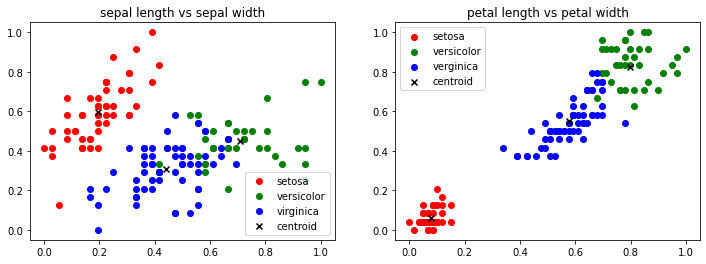

In [32]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.scatter(df1.sepal_length,df1.sepal_width,color='red',label='setosa')
plt.scatter(df2.sepal_length,df2.sepal_width,color='green',label='versicolor')
plt.scatter(df3.sepal_length,df3.sepal_width,color='blue',label='virginica')
plt.scatter(kmeans.cluster_centers_[:,[0]],kmeans.cluster_centers_[:,[1]],color="black",marker="x",label="centroid")
plt.title('sepal length vs sepal width')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(df1.petal_length,df1.petal_width,color='red',label='setosa')
plt.scatter(df2.petal_length,df2.petal_width,color='green',label='versicolor')
plt.scatter(df3.petal_length,df3.petal_width,color='blue',label='verginica')
plt.scatter(kmeans.cluster_centers_[:,[2]],kmeans.cluster_centers_[:,[3]],color="black",marker="x",label="centroid")
plt.title('petal length vs petal width')
plt.legend()

# for more visit www.somenplus.blogspot.com